## Kelompok 7
### Anggota Kelompok:
1. Faiz Bayu Erlangga (2311231)
2. Marco Henrik Abineno (2301093)
3. Muhammad Alfi Fariz (2311174)
4. Naufal Dzaki Ibrahim (2309815)
5. Qalam Noer Fazrian (2304746)

### Kelas: 3KOMC2

### Mata Kuliah: IK505 - Data Mining and Warehouse

### Dosen Pengampu: Dr. Yudi Wibisono, S.T., M.T.


# Import Library

In [215]:
# display
%matplotlib inline
# numerik
import numpy as np
# analisis
import pandas as pd
# plot
import matplotlib.pyplot as plt
# visualisasi
import seaborn as sns

from tabulate import tabulate

# Membaca Data file CSV

In [218]:
df_aids = pd.read_csv("jmlh_kss_br_ds_brdsrkn_klmpk_mr_d_kt_bndng.csv")
df_dbd = pd.read_csv("jmlh_kss_dmm_brdrh_dng_dbd_mnrt_psksms_d_kt_bndng.csv")
df_hpt = pd.read_csv("jmlh_pndrt_hprtns_brs_15_thn_brdsrkn_pmrksn_psksms_d_kt_bndng.csv")
df_jmlh_trbnyk = pd.read_csv("jmlh_psn_brdsrkn_pnykt_trbnyk_d_psksms_kt_bndng.csv")
df_kk_gjh = pd.read_csv("jmlh_psn_flrss_kk_gjh_mnrt_psksms_d_kt_bndng.csv")
df_diare = pd.read_csv("jumlah_pasien_penderita_diare_dilayani_puskesmas_kota_bandung.csv")
df_puskesmas = pd.read_csv("puskesmas_di_kota_bandung.csv")
df_rmhsakit = pd.read_csv("rumah_sakit_di_kota_bandung_2.csv")
df_hemo = pd.read_csv("jumlah_kunjungan_pasien_hemodialisa_di_rsud_kota_bandung.csv")
df_tbc = pd.read_csv("jmlh_kss_br_tbrklss_pr_brdsrkn_fslts_kshtn_d_kt_bndng.csv")

# Membersihkan atribut data yang tidak diperlukan (Praproses)
Dilakukan untuk membersihkan data dengan menghapus kolom yang tidak diperlukan, sehingga hanya kolom yang relevan dengan analisis yang tersisa.

In [221]:
df_aids = df_aids.drop(['id', 'satuan', 'kelompok_umur', 'bps_kode_kabupaten_kota', 'kode_provinsi', 'nama_provinsi', 'bps_nama_kabupaten_kota'],axis=1)

In [223]:
df_dbd = df_dbd.drop(['id', 'satuan', 'kode_provinsi', 'bps_kode_kabupaten_kota', 'kode_provinsi', 'nama_provinsi', 'jenis_kelamin', 'upt_puskesmas', 'bps_nama_kecamatan', 'bps_kode_kecamatan', 'kemendagri_kode_kecamatan', 'kemendagri_nama_kecamatan', 'bps_nama_kabupaten_kota'],axis=1)

In [225]:
df_hpt = df_hpt.drop(['id', 'satuan', 'kode_provinsi', 'bps_kode_kabupaten_kota', 'kode_provinsi', 'nama_provinsi', 'upt_puskesmas', 'bps_nama_kecamatan', 'bps_kode_kecamatan', 'kemendagri_kode_kecamatan', 'kemendagri_nama_kecamatan', 'bps_nama_kabupaten_kota'],axis=1)

In [227]:
df_jmlh_trbnyk = df_jmlh_trbnyk.drop(['satuan'],axis=1)

In [229]:
df_kk_gjh = df_kk_gjh.drop(['id', 'satuan', 'kode_provinsi', 'bps_kode_kabupaten_kota', 'kode_provinsi', 'nama_provinsi', 'upt_puskesmas', 'bps_nama_kecamatan', 'bps_kode_kecamatan', 'kemendagri_kode_kecamatan', 'kemendagri_nama_kecamatan', 'keterangan',  'bps_nama_kabupaten_kota'],axis=1)

In [231]:
df_diare = df_diare.drop(['id', 'satuan', 'kode_provinsi', 'bps_kode_kabupaten_kota', 'kode_provinsi', 'nama_provinsi', 'upt_puskesmas', 'bps_nama_kecamatan', 'bps_kode_kecamatan', 'kemendagri_kode_kecamatan', 'kemendagri_nama_kecamatan', 'bps_nama_kabupaten_kota'],axis=1)

In [233]:
df_puskesmas = df_puskesmas.drop(['id', 'kode_provinsi', 'nama_provinsi', 'bps_kode_kabupaten_kota', 'bps_nama_kabupaten_kota'],axis=1)

In [235]:
df_rmhsakit = df_rmhsakit.drop(['id', 'kode_provinsi', 'nama_provinsi', 'bps_kode_kabupaten_kota', 'bps_kode_kecamatan', 'bps_nama_kecamatan', 'kemendagri_kode_kecamatan', 'kemendagri_nama_kecamatan', 'jenis_rumah_sakit', 'kelas', 'bps_nama_kabupaten_kota'],axis=1)

In [237]:
df_hemo = df_hemo.drop(['id', 'kode_provinsi', 'nama_provinsi', 'bps_kode_kabupaten_kota', 'bps_nama_kabupaten_kota', 'bulan', 'satuan'],axis=1)

In [239]:
df_tbc = df_tbc.drop(['id', 'kode_provinsi', 'nama_provinsi', 'bps_kode_kabupaten_kota', 'bps_nama_kabupaten_kota', 'fasilitas_kesehatan', 'jenis_kelamin', 'satuan'],axis=1)

# Merubah tipe atribut dari data
Mengubah tipe atribut dari data dilakukan agar alokasi memori tidak terlalu besar

In [242]:
df_aids['jumlah_kasus_baru'] = df_aids['jumlah_kasus_baru'].astype('int32')
df_aids['tahun'] = df_aids['tahun'].astype('int32')

In [244]:
df_dbd['jumlah_kasus'] = df_dbd['jumlah_kasus'].astype('int32')
df_dbd['tahun'] = df_dbd['tahun'].astype('int32')

In [246]:
df_hpt['jumlah_penderita_hipertensi'] = df_hpt['jumlah_penderita_hipertensi'].astype('int32')
df_hpt['tahun'] = df_hpt['tahun'].astype('int32')

In [248]:
df_jmlh_trbnyk['jumlah_pasien'] = df_jmlh_trbnyk['jumlah_pasien'].astype('int32')
df_jmlh_trbnyk['tahun'] = df_jmlh_trbnyk['tahun'].astype('int32')

In [250]:
df_kk_gjh['jumlah_pasien'] = df_kk_gjh['jumlah_pasien'].astype('int32')
df_kk_gjh['tahun'] = df_kk_gjh['tahun'].astype('int32')

In [252]:
df_diare['jumlah_pasien'] = df_diare['jumlah_pasien'].astype('int32')
df_diare['tahun'] = df_diare['tahun'].astype('int32')

In [254]:
df_puskesmas['tahun'] = df_puskesmas['tahun'].astype('int32')

In [256]:
df_rmhsakit['tahun'] = df_rmhsakit['tahun'].astype('int32')

In [258]:
df_hemo['jumlah_pasien'] = df_hemo['jumlah_pasien'].astype('int32')
df_hemo['tahun'] = df_hemo['tahun'].astype('int32')

In [260]:
df_tbc['jumlah_kasus_baru'] = df_tbc['jumlah_kasus_baru'].astype('int32')
df_tbc['tahun'] = df_tbc['tahun'].astype('int32')

### Menyaring data hanya dari tahun 2019 - 2022, jika jumlah kasus adalah 0 maka baris data dihapus dan melakukan sorting dari tahun terkecil ke tahun yang besar

In [263]:
con1 = (df_aids['tahun'] >= 2019) & (df_aids['tahun'] <= 2022)
df_aids = df_aids[con1].reset_index(drop=True)
df_aids = df_aids[df_aids['jumlah_kasus_baru'] != 0]
df_aids.to_csv('filtered_data.csv', index=False)
if 'tahun' in df_aids.columns:
    df_aids.sort_values(by='tahun', ascending=True, inplace=True)

In [265]:
con1 = (df_dbd['tahun'] >= 2019) & (df_dbd['tahun'] <= 2022)
df_dbd = df_dbd[con1].reset_index(drop=True)
df_dbd = df_dbd[df_dbd['jumlah_kasus'] != 0]
df_dbd.to_csv('filtered_data.csv', index=False)
if 'tahun' in df_aids.columns:
    df_dbd.sort_values(by='tahun', ascending=True, inplace=True)

In [267]:
con1 = (df_hpt['tahun'] >= 2019) & (df_hpt['tahun'] <= 2022)
df_hpt = df_hpt[con1].reset_index(drop=True)
df_hpt = df_hpt[df_hpt['jumlah_penderita_hipertensi'] != 0]
df_hpt.to_csv('filtered_data.csv', index=False)

In [269]:
con1 = (df_kk_gjh['tahun'] >= 2019) & (df_kk_gjh['tahun'] <= 2022)
df_kk_gjh = df_kk_gjh[con1].reset_index(drop=True)
df_kk_gjh = df_kk_gjh[df_kk_gjh['jumlah_pasien'] != 0]
df_kk_gjh.to_csv('filtered_data.csv', index=False)
if 'tahun' in df_aids.columns:
    df_kk_gjh.sort_values(by='tahun', ascending=True, inplace=True)

In [271]:
con1 = (df_diare['tahun'] >= 2019) & (df_diare['tahun'] <= 2022)
df_diare = df_diare[con1].reset_index(drop=True)
df_diare = df_diare[df_diare['jumlah_pasien'] != 0]
df_diare.to_csv('filtered_data.csv', index=False)
if 'tahun' in df_aids.columns:
    df_diare.sort_values(by='tahun', ascending=True, inplace=True)

In [273]:
con1 = (df_hemo['tahun'] >= 2019) & (df_hemo['tahun'] <= 2022)
df_hemo = df_hemo[con1].reset_index(drop=True)
df_hemo.to_csv('filtered_data.csv', index=False)
if 'tahun' in df_aids.columns:
    df_hemo.sort_values(by='tahun', ascending=True, inplace=True)

In [275]:
con1 = (df_tbc['tahun'] >= 2019) & (df_tbc['tahun'] <= 2022)
df_tbc = df_tbc[con1].reset_index(drop=True)
df_tbc.to_csv('filtered_data.csv', index=False)
if 'tahun' in df_aids.columns:
    df_tbc.sort_values(by='tahun', ascending=True, inplace=True)

### Mengganti nama atribut menjadi "jumlah_kasus_nama penyakit"

In [278]:
df_aids = df_aids.rename(index=str, columns={"jumlah_kasus_baru": "jumlah_kasus_aids"})

In [280]:
df_dbd = df_dbd.rename(index=str, columns={"jumlah_kasus": "jumlah_kasus_dbd"})

In [282]:
df_hpt = df_hpt.rename(index=str, columns={"jumlah_penderita_hipertensi": "jumlah_kasus_hipertensi"})

In [284]:
df_kk_gjh = df_kk_gjh.rename(index=str, columns={"jumlah_pasien": "jumlah_kasus_kaki_gajah"})

In [286]:
df_diare = df_diare.rename(index=str, columns={"jumlah_pasien": "jumlah_kasus_diare"})

In [288]:
df_hemo = df_hemo.rename(index=str, columns={"jumlah_pasien": "jumlah_kasus_hemodialisa"})

In [290]:
df_tbc = df_tbc.rename(index=str, columns={"jumlah_kasus_baru": "jumlah_kasus_tubercolosis_paru"})

In [292]:
df_aids.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 4 to 38
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   jumlah_kasus_aids  22 non-null     int32
 1   tahun              22 non-null     int32
dtypes: int32(2)
memory usage: 352.0+ bytes


In [294]:
df_dbd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 639
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   jumlah_kasus_dbd  639 non-null    int32
 1   tahun             639 non-null    int32
dtypes: int32(2)
memory usage: 10.0+ KB


In [295]:
df_hpt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 0 to 319
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   jumlah_kasus_hipertensi  318 non-null    int32
 1   tahun                    318 non-null    int32
dtypes: int32(2)
memory usage: 5.0+ KB


In [296]:
df_kk_gjh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 42 to 1388
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   jumlah_kasus_kaki_gajah  91 non-null     int32
 1   tahun                    91 non-null     int32
dtypes: int32(2)
memory usage: 1.4+ KB


In [299]:
df_diare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 0 to 321
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   jumlah_kasus_diare  322 non-null    int32
 1   tahun               322 non-null    int32
dtypes: int32(2)
memory usage: 5.0+ KB


In [301]:
df_hemo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   jumlah_kasus_hemodialisa  48 non-null     int32
 1   tahun                     48 non-null     int32
dtypes: int32(2)
memory usage: 768.0+ bytes


In [303]:
df_tbc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   jumlah_kasus_tubercolosis_paru  642 non-null    int32
 1   tahun                           642 non-null    int32
dtypes: int32(2)
memory usage: 10.0+ KB


### Grouping atribut tahun dengan jumlah kasus penyakitnya, kemudian dijumlahkan menurut tahunnya, lalu tabel-tabel tersebut dimerged menjadi 1 tabel berdasarkan tahun

In [306]:
df_aids_grouped = df_aids.groupby('tahun')['jumlah_kasus_aids'].sum().reset_index()
df_dbd_grouped = df_dbd.groupby('tahun')['jumlah_kasus_dbd'].sum().reset_index()
df_hpt_grouped = df_hpt.groupby('tahun')['jumlah_kasus_hipertensi'].sum().reset_index()
df_kk_gjh_grouped = df_kk_gjh.groupby('tahun')['jumlah_kasus_kaki_gajah'].sum().reset_index()
df_diare_grouped = df_diare.groupby('tahun')['jumlah_kasus_diare'].sum().reset_index()
df_hemo_grouped = df_hemo.groupby('tahun')['jumlah_kasus_hemodialisa'].sum().reset_index()
df_tbc_grouped = df_tbc.groupby('tahun')['jumlah_kasus_tubercolosis_paru'].sum().reset_index()

# Kemudian jika ingin menggabungkan semua dataframe menjadi satu:
df_merged1 = pd.merge(df_aids_grouped, df_dbd_grouped, on='tahun', how='outer', suffixes=('_aids', '_dbd'))
df_merged2 = pd.merge(df_merged1, df_hpt_grouped, on='tahun', how='outer', suffixes=('', '_hpt'))
df_merged3 = pd.merge(df_merged2, df_diare_grouped, on='tahun', how='outer', suffixes=('', '_diare'))
df_merged4 = pd.merge(df_merged3, df_kk_gjh_grouped, on='tahun', how='outer', suffixes=('', '_kk_gjh'))
df_merged5 = pd.merge(df_merged4, df_hemo_grouped, on='tahun', how='outer', suffixes=('', '_hemo'))
df_merged6 = pd.merge(df_merged5, df_tbc_grouped, on='tahun', how='outer', suffixes=('', '_tbc'))

In [308]:
# Ambil kolom yang diinginkan, sesuaikan dengan kolom yang sudah digabungkan
df_merged = df_merged6.loc[:, ['tahun', 'jumlah_kasus_aids', 'jumlah_kasus_dbd', 'jumlah_kasus_hipertensi', 'jumlah_kasus_diare', 'jumlah_kasus_kaki_gajah', 'jumlah_kasus_hemodialisa', 'jumlah_kasus_tubercolosis_paru']]

# Tampilkan 5 baris pertama
df_merged.head(5)

,tahun,jumlah_kasus_aids,jumlah_kasus_dbd,jumlah_kasus_hipertensi,jumlah_kasus_diare,jumlah_kasus_kaki_gajah,jumlah_kasus_hemodialisa,jumlah_kasus_tubercolosis_paru
0,2019,113,4424,722927,51267,42,5734,7491
1,2020,67,2790,698686,30954,29,6098,2440
2,2021,70,3743,696372,15647,20,5271,1991
3,2022,31,5205,706048,26523,15,5815,2643


# Visualisasi Data

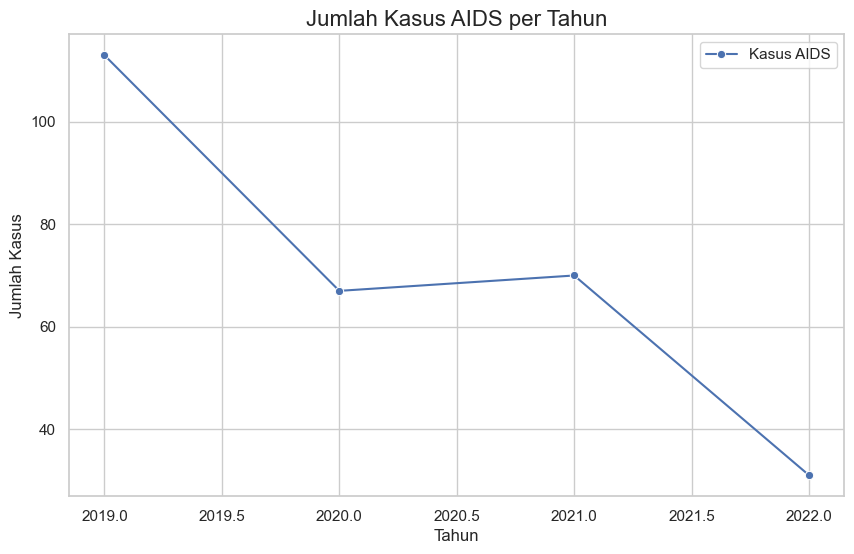

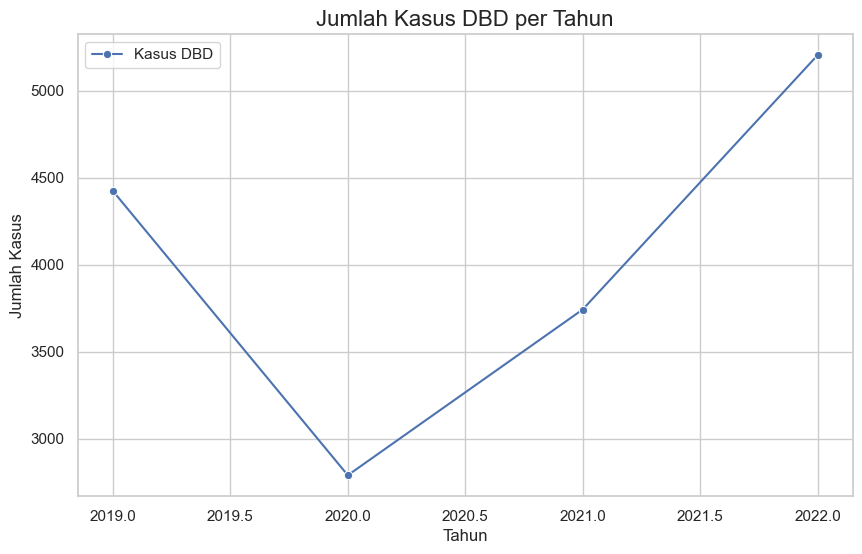

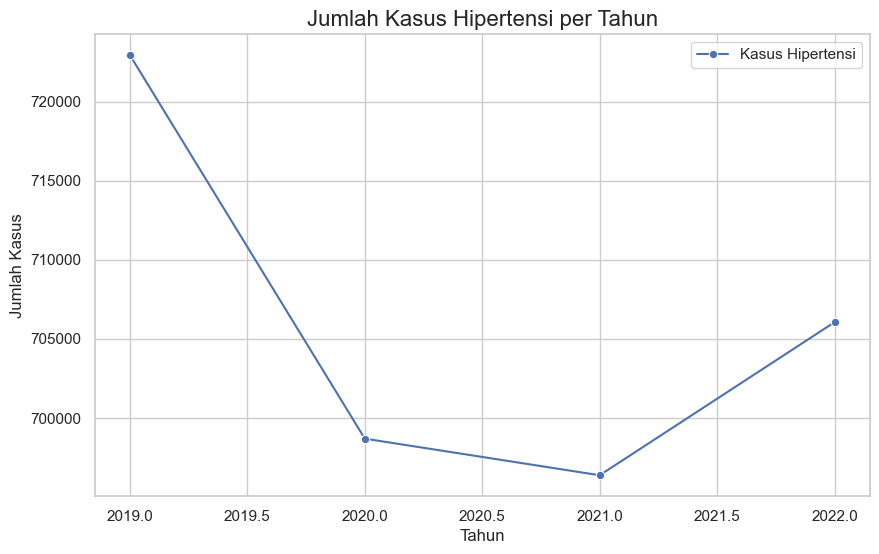

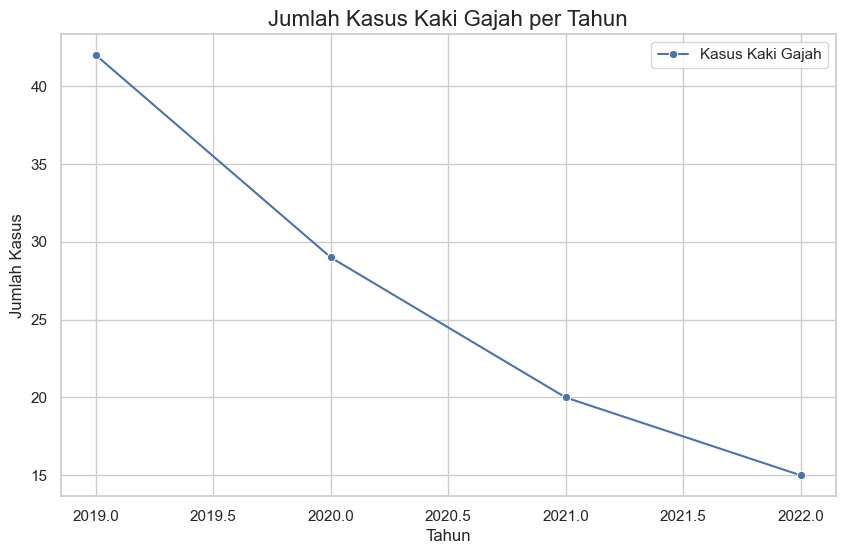

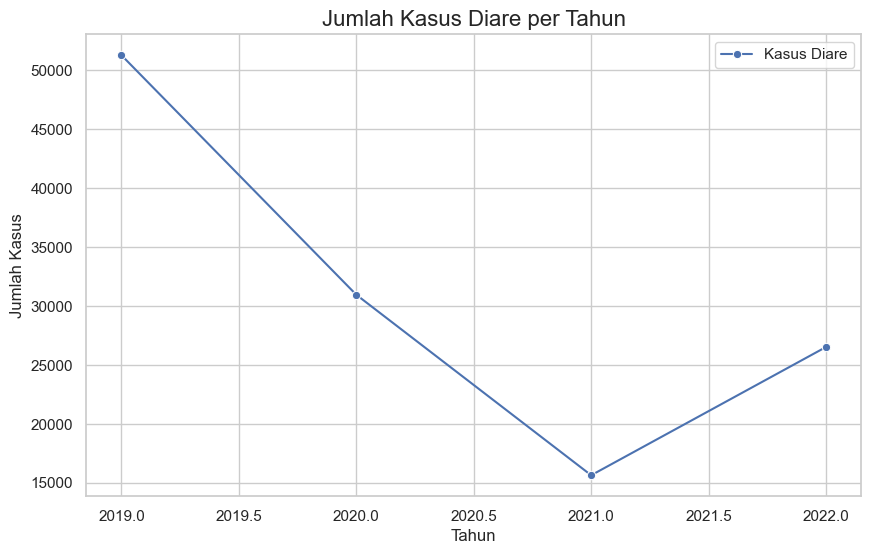

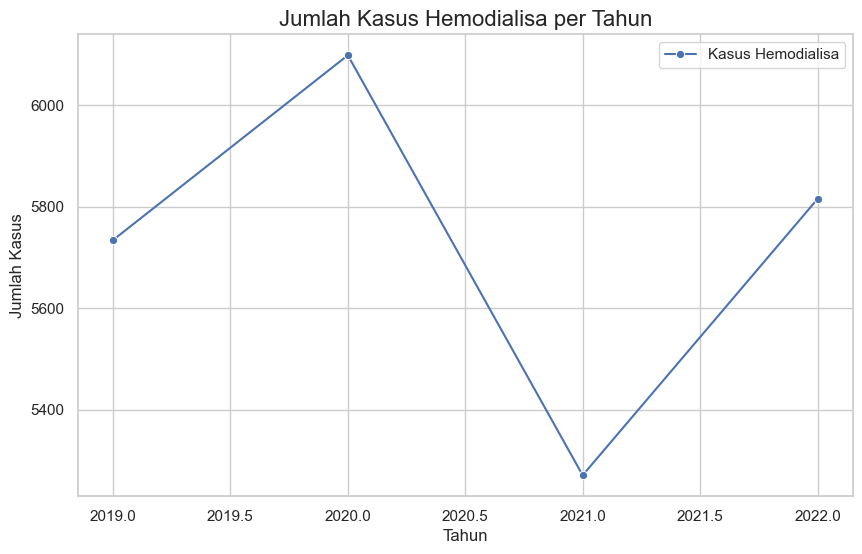

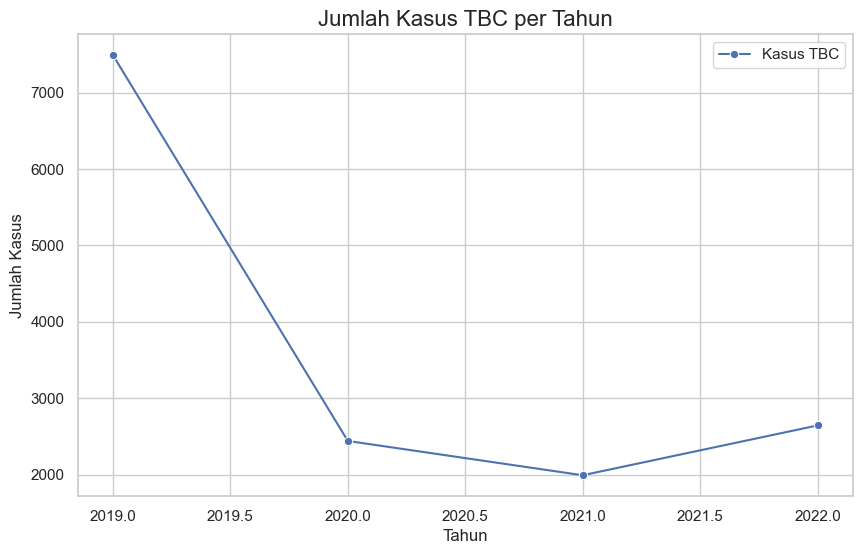

In [312]:
# Set style seaborn
sns.set(style="whitegrid")

# Buat list penyakit
penyakit = [
    ('Kasus AIDS', 'jumlah_kasus_aids'),
    ('Kasus DBD', 'jumlah_kasus_dbd'),
    ('Kasus Hipertensi', 'jumlah_kasus_hipertensi'),
    ('Kasus Kaki Gajah', 'jumlah_kasus_kaki_gajah'),
    ('Kasus Diare', 'jumlah_kasus_diare'),
    ('Kasus Hemodialisa', 'jumlah_kasus_hemodialisa'),
    ('Kasus TBC', 'jumlah_kasus_tubercolosis_paru')
]

# Buat plot untuk setiap penyakit
for label, kolom in penyakit:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_tuberk, x='tahun', y=kolom, marker='o', label=label)
    
    # Menambah judul dan label sumbu
    plt.title(f'Jumlah {label} per Tahun', fontsize=16)
    plt.xlabel('Tahun', fontsize=12)
    plt.ylabel('Jumlah Kasus', fontsize=12)
    
    # Menampilkan grid dan legenda
    plt.grid(True)
    plt.legend()
    
    # Tampilkan plot
    plt.show()

### AIDS:
Jika kita amati data yang divisualisasikan di grafik berdasarkan tahunnya,penyakit aids cenderung mengalami tren penurunan dari tahun 2019 hingga tahun 2022.
Pada tahun 2019 terdapat sekitar 113 kasus aids di kota bandung ini,tahun 2020 terdapat sekitar 67 kasus,tahun 2021 terdapat 70 kasus dan pada akhir tahun 2022  telah menurun hingga mencapai angka 31 kasus saja.Mulai dari tahun 2019-2020 terjadi tren penurunan hingga 59,2%,kemudian pada tahun 2020-2021 ada kenaikan sedikit tren penyakit sebesar 4,3%,tahun 2021-2022 terjadi lagi tren penurunan sebesar 44,2% yang artinya pasien penderita penyakit AIDS dalam kurun waktu 4 tahun tersebut cenderung mengalami penurunan dan juga jumlah puskesmas serta rumah sakit yang ada pada data tahun 2022 bisa menjadi salah satu tolak ukur dan factor yang memengaruhi tren penurunan ini.

### DBD:
Melihat dari data yang disajikan dalam grafik,tren penyakit DBD cenderung mengalami tren kenaikan dari tahun 2019 hingga tahun 2022 walaupun sempat ada penurunan pada tahun 2019-2020.
Pada tahun 2019 terdapat sekitar 4424 kasus,tahun 2020 terdapat 2790 kasus,tahun 2021 terdapat 3743 kasus,dan tahun 2022 terdapat 5205 kasus.Mulai dari tahun 2019-2020 terjadi penurunan yang cukup signifikan sebesar 63%,lalu pada tahun 2020-2021 mulai terjadi tren kenaikkan kasus hingga 34%,dan pada tahun 2021-2022 terdapat kenaikan kasus sebesar 39% yartinya pasien penderita penyakit DBD dalam kurun waktu 4 tahun tersebut cenderung mengalami kenaikan kasus dan juga jumlah puskesmas serta rumah sakit yang ada pada data tahun 2022 bisa menjadi tolak ukur dan factor yang memengaruhi tren kenaikkan ini.

### Hipertensi:
Jika kita amati data yang divisualisasikan di grafik berdasarkan tahunnya,penyakit aids cenderung mengalami tren penurunan dari tahun 2019 hingga tahun 2021 meskipun pada tahun 2022 terjadi kenaikan tidak signifikan.
Pada tahun 2019 terdapat sekitar 722927  kasus hipertensi di kota bandung ini,tahun 2020 terdapat sekitar 698686 kasus,tahun 2021 terdapat 696372 kasus dan pada akhir tahun 2022  naik hingga mencapai angka 706048 kasus.Mulai dari tahun 2019-2020 terjadi tren penurunan hingga 3,4%,kemudian pada tahun 2020-2021 turun sebesar 0,34%,tahun 2021-2022 terjadi tren kenaikkan sebesar 1,38% yang artinya pasien penderita penyakit Hipertensi dalam kurun waktu 4 tahun tersebut cenderung mengalami penurunan dan juga jumlah puskesmas serta rumah sakit yang ada pada data tahun 2022 bisa menjadi tolak ukur dan factor yang memengaruhi tren penurunan ini.

### Kaki Gajah:
Jika kita amati data yang divisualisasikan di grafik berdasarkan tahunnya,penyakit kaki gajah selalu mengalami tren penurunan selama 4 tahun dari tahun 2019 hingga tahun 2022.
Pada tahun 2019 terdapat 42 kasus,sedangkan pada tahun 2020 terdapat 29 kasus,pada tahun 2021 terdapat 20 kasus dan pada tahun 2022 terdapat 15kasus.Mulai dari tahun 2019-2020 terjadi penurunan sebesar 30.95%,pada tahun 2020-2021 terjadi penurunan juga hingga 31.03%,dan pada tahun 2021-2022 terjadi penurunan sebesar 25.00% yang artinya pasien penderita penyakit Diare dalam kurun waktu 4 tahun tersebut cenderung mengalami penurunan dan juga jumlah puskesmas serta rumah sakit yang ada pada data tahun 2022 bisa menjadi salah satu tolak ukur dan factor yang memengaruhi tren penurunan ini.

### Diare:
Jika kita amati data yang divisualisasikan di grafik berdasarkan tahunnya,penyakit diare cenderung mengalami tren penurunan dari tahun 2019 hingga tahun 2021 meskipun pada tahun 2022 terjadi tren kenaikkan.
Pada tahun 2019 terdapat 51267 kasus,sedangkan pada tahun 2020 terdapat 30954 kasus,pada tahun 2021 terdapat 15647 kasus dan pada tahun 2022 terdapat 26523 kasus.Mulai dari tahun 2019-2020 terjadi penurunan sebesar 39.62%,pada tahun 2020-2021 terjadi penurunan juga hingga 49.36%,dan pada tahun 2022 terjadi kenaikkan sebesar 69.22% yang artinya pasien penderita penyakit Diare dalam kurun waktu 4 tahun tersebut cenderung mengalami penurunan dan juga jumlah puskesmas serta rumah sakit yang ada pada data tahun 2022 bisa menjadi salah satu tolak ukur dan factor yang memengaruhi tren penurunan ini.

### Hemodialisa:
Jika kita amati data yang divisualisasikan di grafik berdasarkan tahunnya,penyakit Hemodialisa cenderung fluktuatif sepanjang tahun 2019-2022.Mulai dari tahun 2019-2020 terjadi kenaikkan tren penyakit mencapai 6,35%,kemudian pada tahun 2020-2021 turun sebesar 13,56% dan pada tahun 2021-2022 naik sebesar 10,32% yang artinya pasien penderita penyakit Hemodialisa dalam kurun waktu 4 tahun tersebut fluktuatif dan juga jumlah puskesmas serta rumah sakit yang ada pada data tahun 2022 bisa menjadi tolak ukur dan faktor yang memengaruhi ke fluktuatifan data ini,walaupun tidak sepenuhnya adalah factor dari rumah sakit dan puskesmas yang ada di kota bandung.

### TBC:
Jika kita amati data yang divisualisasikan di grafik berdasarkan tahunnya,penyakit TBC cenderung mengalami tren penurunan dari tahun 2019 hingga tahun 2021 meskipun pada tahun 2022 terjadi tren kenaikkan.
Pada tahun 2019 terdapat 7491 kasus,sedangkan pada tahun 2020 terdapat 2440 kasus,pada tahun 2021 terdapat 1991 kasus dan pada tahun 2022 terdapat 2643 kasus.Mulai dari tahun 2019-2020 terjadi penurunan sebesar 67,42%,pada tahun 2020-2021 terjadi penurunan juga hingga 18,40%,dan pada tahun 2022 terjadi kenaikkan sebesar 32,75% yang artinya pasien penderita penyakit TBC dalam kurun waktu 4 tahun tersebut cenderung mengalami penurunan dan juga jumlah puskesmas serta rumah sakit yang ada pada data tahun 2022 bisa menjadi salah satu tolak ukur dan factor yang memengaruhi tren penurunan ini.

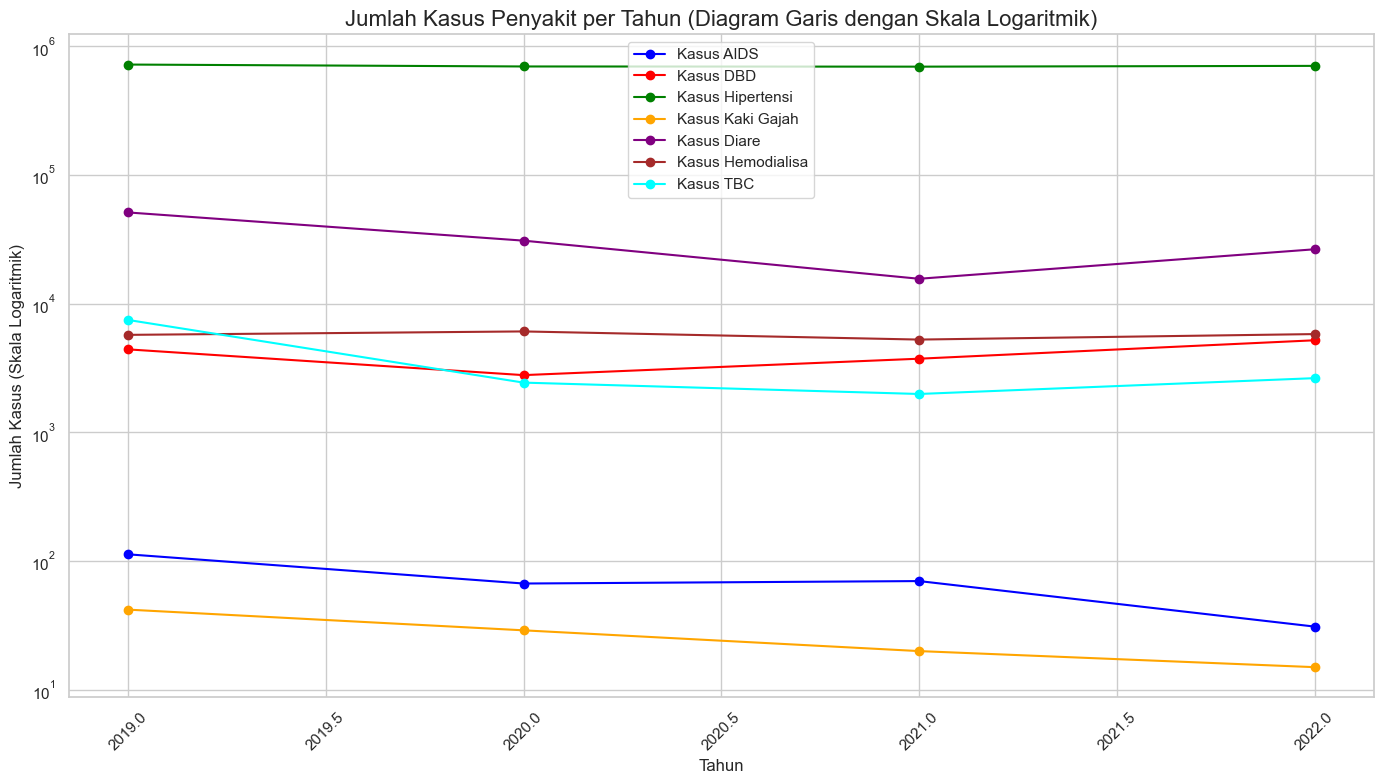

In [314]:
# Mengatur ukuran figure
plt.figure(figsize=(14, 8))

# Menggambar garis untuk masing-masing penyakit dengan warna berbeda
plt.plot(df_merged6['tahun'], df_merged6['jumlah_kasus_aids'], marker='o', color='blue', label='Kasus AIDS')
plt.plot(df_merged6['tahun'], df_merged6['jumlah_kasus_dbd'], marker='o', color='red', label='Kasus DBD')
plt.plot(df_merged6['tahun'], df_merged6['jumlah_kasus_hipertensi'], marker='o', color='green', label='Kasus Hipertensi')
plt.plot(df_merged6['tahun'], df_merged6['jumlah_kasus_kaki_gajah'], marker='o', color='orange', label='Kasus Kaki Gajah')
plt.plot(df_merged6['tahun'], df_merged6['jumlah_kasus_diare'], marker='o', color='purple', label='Kasus Diare')
plt.plot(df_merged6['tahun'], df_merged6['jumlah_kasus_hemodialisa'], marker='o', color='brown', label='Kasus Hemodialisa')
plt.plot(df_merged6['tahun'], df_merged6['jumlah_kasus_tubercolosis_paru'], marker='o', color='cyan', label='Kasus TBC')

# Menambahkan label dan judul
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Kasus (Skala Logaritmik)', fontsize=12)
plt.title('Jumlah Kasus Penyakit per Tahun (Diagram Garis dengan Skala Logaritmik)', fontsize=16)

# Menambahkan grid dan legenda
plt.grid(True)
plt.legend()

# Mengatur skala Y ke logaritmik
plt.yscale('log')

# Tampilkan plot
plt.xticks(rotation=45)  # Memutar label tahun agar lebih terbaca
plt.tight_layout()  # Menyesuaikan layout
plt.show()

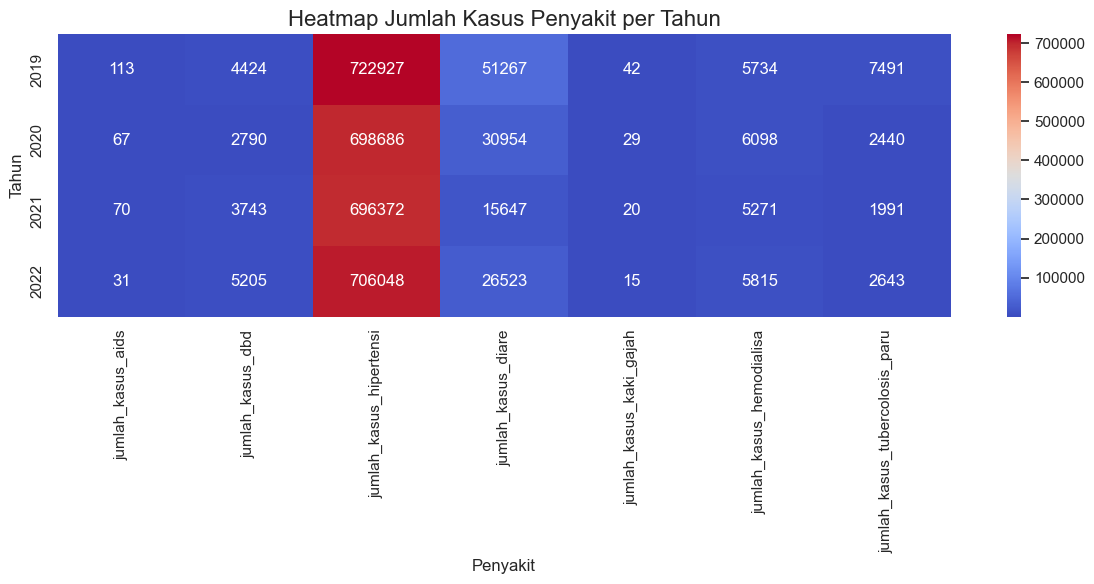

In [315]:
# Mengatur tahun sebagai index
df_heatmap = df_merged6.set_index('tahun')

# Mengatur ukuran figure
plt.figure(figsize=(12, 6))

# Membuat heatmap
sns.heatmap(df_heatmap, annot=True, fmt='g', cmap='coolwarm', cbar=True)

# Menambahkan judul dan label
plt.title('Heatmap Jumlah Kasus Penyakit per Tahun', fontsize=16)
plt.xlabel('Penyakit', fontsize=12)
plt.ylabel('Tahun', fontsize=12)

# Tampilkan plot
plt.tight_layout()
plt.show()

Dengan menggabungkan data dari beberapa tahun, analisis tren seiring waktu dapat dilakukan untuk melihat bagaimana jumlah kasus penyakit berubah dari tahun ke tahun. Pendekatan ini memberikan pemahaman yang lebih dalam tentang dinamika kesehatan masyarakat, memungkinkan pembaca untuk mengidentifikasi pola yang mungkin tidak terlihat jika data hanya dianalisis secara terpisah. 

Salah satu hasil yang mencolok dari analisis ini adalah bahwa jumlah kasus hipertensi selalu menjadi yang paling tinggi dibandingkan dengan penyakit lainnya. Hal ini menunjukkan bahwa hipertensi merupakan masalah kesehatan yang signifikan dan terus menerus mempengaruhi populasi, menandakan perlunya perhatian khusus dari pihak otoritas kesehatan.

In [317]:
# Mengambil kolom yang diinginkan dari DataFrame puskesmas dan rumah sakit
df_puskesmas_selected = df_puskesmas.loc[:, ['nama_puskesmas', 'alamat', 'tahun']]
df_rmhsakit_selected = df_rmhsakit.loc[:, ['nama_rumah_sakit', 'alamat', 'tahun']]

# Menampilkan tabel Puskesmas dengan border
print("=== Data Puskesmas ===")
print(tabulate(df_puskesmas_selected, headers='keys', tablefmt='grid', showindex=False))

# Menampilkan tabel Rumah Sakit dengan border
print("\n=== Data Rumah Sakit ===")
print(tabulate(df_rmhsakit_selected, headers='keys', tablefmt='grid', showindex=False))

# Menghitung total jumlah puskesmas dan rumah sakit
total_puskesmas = df_puskesmas_selected.shape[0]
total_rmhsakit = df_rmhsakit_selected.shape[0]
total_jumlah = total_puskesmas + total_rmhsakit

# Menampilkan total jumlah
print(f"\nTotal Puskesmas: {total_puskesmas}")
print(f"Total Rumah Sakit: {total_rmhsakit}")
print(f"Total Jumlah (Puskesmas + Rumah Sakit): {total_jumlah}")

=== Data Puskesmas ===
+-------------------+---------------------------------------------------------------+---------+
| nama_puskesmas    | alamat                                                        |   tahun |
+===================+===============================================================+=========+
| PANGHEGAR         | JL. TERATAI MEKAR NO. 2                                       |    2022 |
+-------------------+---------------------------------------------------------------+---------+
| PANYILEUKAN       | JL. RAYA PANYILEUKAN                                          |    2022 |
+-------------------+---------------------------------------------------------------+---------+
| GRIYA ANTAPANI    | JL. PLERED RAYA N0.2 ANTAPANI                                 |    2022 |
+-------------------+---------------------------------------------------------------+---------+
| SUKAPAKIR         | JL. PAGARSIH GG.PA OYOH NO. 27 6/6                            |    2022 |
+----------------

Dari data rumah sakit dan puskesmas yang tersedia pada tahun 2022 diatas,bisa kita lihat bahwa dengan adanya jumlah rumah sakit beserta puskesmas yang ada di kota bandung ini,bisa dijadikan tolak ukur dan faktor dalam keberhasilan menangani banyaknya pasien penderita penyakit yang ada di kota bandung karena data yang ditunjukkan oleh grafis,kebanyakan jumlah pasien penderita penyakit antara tahun 2019 hingga tahun 2022 hampir seluruhnya mengalami penurunan tren kecuali penyakit DBD mengalami tren kenaikkan dan Hemodialisa fluktuatif.Diluar faktor rumah sakit dan puskesmas yang ada di kota bandung,kedua penyakit tersebut mungkin menerima faktor lain yang menyebabkan terjadinya tren kenaikkan dan tren yang fluktuatif pada kedua penyakit tersebut dalam kurun waktu 4 tahun antara tahun 2019 hingga tahun 2022.

# Kesimpulan
Data Data yang divisualisasikan oleh kelompok kami bertujuan untuk memberi informasi kepada pembaca tentang tren penyakit selama beberapa tahun kebelakang antara tahun 2019-2022. Kami menyediakan data data ini juga sebagai pengingat kepada pembaca akan pentingnya menjaga kesehatan walaupun dalam data tersebut ada tren penurunan dan kenaikkan penyakit yang beragam,juga kami menyediakan data puskesmas beserta data rumah sakit untuk memperlihatkan kepada para pembaca dan bisa menjadi salah satu faktor yang memengaruhi terjadinya tren kenaikkan atau penurunan penyakit yang terjadi di kota bandung selama kurun waktu 4 tahun dari tahun 2019 hingga tahun 2022 walaupun masih banyak factor penentu lain yang mempengaruhinya.